<a href="https://colab.research.google.com/github/BimaAfka14/Sentiment-Analisis-Machine-Learning/blob/master/Sentiment_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Membaca Dataset**

In [ ]:
import pandas as pd

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv('youtube_video_comments.csv')

# Menampilkan beberapa baris awal untuk memahami format data
print(data.head())


              Timestamp      Username      VideoID  \
0  2024-06-25T14:46:41Z  @SalehBangko  Ua21uPr1eRc   
1  2024-06-25T14:19:03Z  @SalehBangko  Ua21uPr1eRc   
2  2024-06-25T14:15:02Z  @SalehBangko  Ua21uPr1eRc   
3  2024-06-25T14:14:28Z  @SalehBangko  Ua21uPr1eRc   
4  2024-06-25T14:04:06Z  @SalehBangko  Ua21uPr1eRc   

                                 Comment                  Date  
0            Daerah Aceh laut biru 25.00  2024-06-25T14:46:41Z  
1                      110 laut biru pak  2024-06-25T14:19:03Z  
2        Dari balikpapan 21.00 laut biru  2024-06-25T14:15:02Z  
3   Masuk lagi laut biru 27.00 jumlahnya  2024-06-25T14:14:28Z  
4  Kalimantan Timur daerah bontang 57.00  2024-06-25T14:04:06Z  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  4494 non-null   object
 1   Username   4494 non-null   object
 2   VideoID    4494 non-null   object
 3   Comment    4494 non-null   object
 4   Date       4494 non-null   object
dtypes: object(5)
memory usage: 175.7+ KB


**2.Visualisasi Data**

2.1.WordCloud

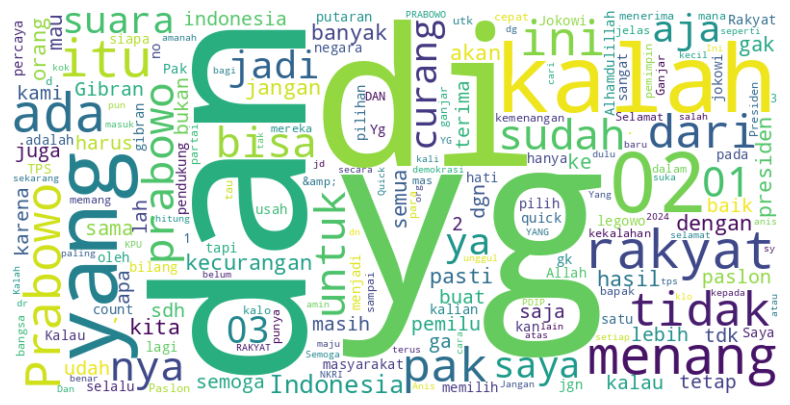

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Membaca data dari file CSV
df = pd.read_csv('youtube_video_comments.csv')

# Menggabungkan semua teks dari kolom 'Sentiment' menjadi satu string
text = ' '.join(df['Comment'])

# Menghitung frekuensi kata
word_freq = Counter(text.split())

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


2.2.Frekuensi Kata

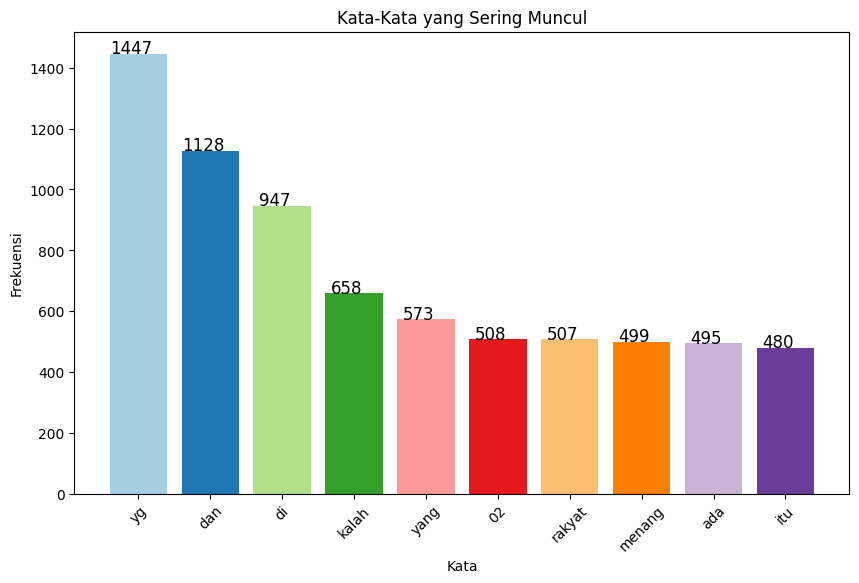

In [ ]:
import matplotlib.pyplot as plt
from collections import  Counter

text = " ".join(data['Comment'])

tokens = text.split()
counter = Counter(tokens)

most_common = counter.most_common(10)
words, counts = zip(*most_common)

colors = plt.cm.Paired(range(len(words)))

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-Kata yang Sering Muncul')
plt.xticks(rotation=45)

for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize = 12, color='black' ,ha='center')

plt.show()

**3.Pre Processing**

In [ ]:
import re
import string
import html
import nltk

df = pd.DataFrame(data[['Username', 'Comment']])
df.head()

,Username,Comment
0,@SalehBangko,Daerah Aceh laut biru 25.00
1,@SalehBangko,110 laut biru pak
2,@SalehBangko,Dari balikpapan 21.00 laut biru
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00


In [ ]:
df = df.drop_duplicates(subset=['Username', 'Comment'])
df = df.dropna()
df.shape

(4441, 2)

3.1.Membersihkan Kalimat

In [ ]:
def clean_comment(text):
  # Decode HTML entities
  text = html.unescape(text)

  # Mengganti titik dengan spasi
  text = re.sub(r'\.', ' ', text)

  # Menghapus tag HTML seperti <br>
  text = re.sub(r'<[^>]+>', '', text)

  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  # Menghapus angka
  text = re.sub(r'\b\d+\b', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

# df['Cleaning'] = df['Comment'].apply(clean_comment)
df['Cleaning'] = df['Comment'].str.lower().apply(clean_comment)

# Pilih kolom yang diinginkan
df_cleaned = df[['Username', 'Comment', 'Cleaning']]

# Simpan DataFrame yang telah dibersihkan ke file CSV
df.to_csv('cleaned_comments.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  4494 non-null   object
 1   Username   4494 non-null   object
 2   VideoID    4494 non-null   object
 3   Comment    4494 non-null   object
 4   Date       4494 non-null   object
dtypes: object(5)
memory usage: 175.7+ KB


3.2.Normalisasi

In [ ]:
import pandas as pd

#Fungsi pengganti kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
  if isinstance(text, str):
    words = text.split()
    replaced_words = []
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []
    for word in words:
      if word in kamus_tidak_baku:
        baku_word = kamus_tidak_baku[word]
        if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
          replaced_words.append(baku_word)
          kalimat_baku.append(baku_word)
          kata_diganti.append(baku_word)
          kata_tidak_baku_hash.append(hash(word))
      else:
        replaced_words.append(word)
      replaced_text = ' '.join(replaced_words)
  else:
    replaced_text = ''
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []
  return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
data = pd.read_csv('cleaned_comments.csv')

data = pd.DataFrame(data[['Username','Comment','Cleaning']])
data.head()

,Username,Comment,Cleaning
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru
1,@SalehBangko,110 laut biru pak,laut biru pak
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang


In [ ]:
#Baca kamus kata tidak baku
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kata_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
kamus_data.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
#Terapkan fungsi penggantian kata tidak baku
data['Normalisasi'], data['Kata_Baku'], data['kata_tidak_baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['Cleaning'].apply(lambda x: replace_taboo_words(x, kata_tidak_baku)))

df = pd.DataFrame(data[['Username', 'Comment', 'Normalisasi']])
df.head()

,Username,Comment,Normalisasi
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru
1,@SalehBangko,110 laut biru pak,laut biru pak
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang


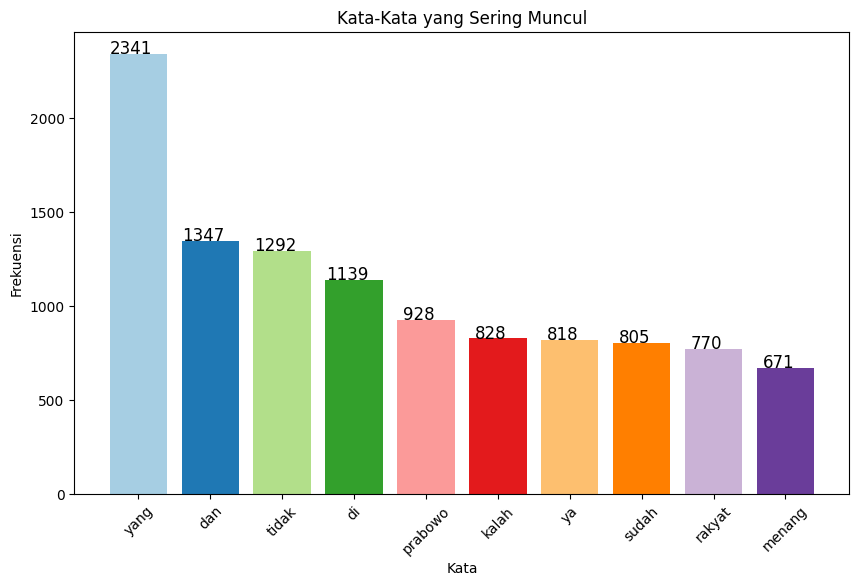

In [ ]:
import matplotlib.pyplot as plt
from collections import  Counter

text = " ".join(data['Normalisasi'])

tokens = text.split()
counter = Counter(tokens)

most_common = counter.most_common(10)
words, counts = zip(*most_common)

colors = plt.cm.Paired(range(len(words)))

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-Kata yang Sering Muncul')
plt.xticks(rotation=45)

for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize = 12, color='black' ,ha='center')

plt.show()

# Simpan DataFrame yang telah dibersihkan ke file CSV
df.to_csv('cleaned_comments.csv', index=False)

In [ ]:
#Mengimpor library pandas dan memberikan alias pd
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('cleaned_comments.csv')

# Mengisi nilai yang hilang (NaN) dengan string kosong
data['Normalisasi'].fillna('', inplace=True)

text = " ".join(data['Normalisasi'])
tokens = text.split()
#menghitung frekuensi kemunculan setiap kata
word_counts = Counter(tokens)

#menampilkan 10 kata teratas
most_common_words = word_counts.most_common(10)

words, counts = zip(*most_common_words)
data = pd.DataFrame({'Kata': words, 'Frekuensi': counts})

data.to_csv('most_common_words.csv', index=False)

3.3.Tokenisasi

In [ ]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Normalisasi'].apply(nltk.word_tokenize)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Username,Comment,Normalisasi,Tokenization
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru,"[daerah, aceh, laut, biru]"
1,@SalehBangko,110 laut biru pak,laut biru pak,"[laut, biru, pak]"
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru,"[dari, balikpapan, laut, biru]"
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya,"[masuk, lagi, laut, biru, jumlahnya]"
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang,"[kalimantan, timur, daerah, bontang]"
...,...,...,...,...
4436,@srinurhidayati3323,Alhamdulillah prabowo gibran ttp terbaik power...,alhamdulillah prabowo gibran tetap terbaik pow...,"[alhamdulillah, prabowo, gibran, tetap, terbai..."
4437,@DadiRohadi-gz7dp,Waw 03 minta d ulang cape aah udh jls 02 mnang,wow meminta di ulang capek aah sudah jls mnang,"[wow, meminta, di, ulang, capek, aah, sudah, j..."
4438,@widoyotop702,Alhamdulillah 02 masih Unggul ✌✌✌🛫🛫🛫,alhamdulillah masih unggul,"[alhamdulillah, masih, unggul]"
4439,@user-qw1hp8nn6p,03 minta di ulang pemilunya 😅,meminta di ulang pemilunya,"[meminta, di, ulang, pemilunya]"


3.4.Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the Indonesian stopwords
stop_words = stopwords.words('indonesian')

# Add the word 'ya' to the stopwords list
stop_words.append('ya')

# Optional: Convert the stopwords list to a set for faster lookup
stop_words = set(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3.5.Tokenisasi

In [ ]:
def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

df['Stopwords'] = df['Tokenization'].apply(remove_stopwords)
df

,Username,Comment,Normalisasi,Tokenization,Stopwords
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru,"[daerah, aceh, laut, biru]","[daerah, aceh, laut, biru]"
1,@SalehBangko,110 laut biru pak,laut biru pak,"[laut, biru, pak]","[laut, biru]"
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru,"[dari, balikpapan, laut, biru]","[balikpapan, laut, biru]"
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya,"[masuk, lagi, laut, biru, jumlahnya]","[masuk, laut, biru]"
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang,"[kalimantan, timur, daerah, bontang]","[kalimantan, timur, daerah, bontang]"
...,...,...,...,...,...
4436,@srinurhidayati3323,Alhamdulillah prabowo gibran ttp terbaik power...,alhamdulillah prabowo gibran tetap terbaik pow...,"[alhamdulillah, prabowo, gibran, tetap, terbai...","[alhamdulillah, prabowo, gibran, terbaik, powe..."
4437,@DadiRohadi-gz7dp,Waw 03 minta d ulang cape aah udh jls 02 mnang,wow meminta di ulang capek aah sudah jls mnang,"[wow, meminta, di, ulang, capek, aah, sudah, j...","[wow, ulang, capek, aah, jls, mnang]"
4438,@widoyotop702,Alhamdulillah 02 masih Unggul ✌✌✌🛫🛫🛫,alhamdulillah masih unggul,"[alhamdulillah, masih, unggul]","[alhamdulillah, unggul]"
4439,@user-qw1hp8nn6p,03 minta di ulang pemilunya 😅,meminta di ulang pemilunya,"[meminta, di, ulang, pemilunya]","[ulang, pemilunya]"


3.6.Stemmer

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return stemmer.stem(text)

# df['Stemming'] = df['Stopwords'].apply(lambda x: ' '.join(stem_text(x)))
df['Stemming'] = df['Stopwords'].apply(stem_text)
df

,Username,Comment,Normalisasi,Tokenization,Stopwords,Stemming
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru,"[daerah, aceh, laut, biru]","[daerah, aceh, laut, biru]",daerah aceh laut biru
1,@SalehBangko,110 laut biru pak,laut biru pak,"[laut, biru, pak]","[laut, biru]",laut biru
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru,"[dari, balikpapan, laut, biru]","[balikpapan, laut, biru]",balikpapan laut biru
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya,"[masuk, lagi, laut, biru, jumlahnya]","[masuk, laut, biru]",masuk laut biru
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang,"[kalimantan, timur, daerah, bontang]","[kalimantan, timur, daerah, bontang]",kalimantan timur daerah bontang
...,...,...,...,...,...,...
4436,@srinurhidayati3323,Alhamdulillah prabowo gibran ttp terbaik power...,alhamdulillah prabowo gibran tetap terbaik pow...,"[alhamdulillah, prabowo, gibran, tetap, terbai...","[alhamdulillah, prabowo, gibran, terbaik, powe...",alhamdulillah prabowo gibran baik power lieder...
4437,@DadiRohadi-gz7dp,Waw 03 minta d ulang cape aah udh jls 02 mnang,wow meminta di ulang capek aah sudah jls mnang,"[wow, meminta, di, ulang, capek, aah, sudah, j...","[wow, ulang, capek, aah, jls, mnang]",wow ulang capek aah jls mnang
4438,@widoyotop702,Alhamdulillah 02 masih Unggul ✌✌✌🛫🛫🛫,alhamdulillah masih unggul,"[alhamdulillah, masih, unggul]","[alhamdulillah, unggul]",alhamdulillah unggul
4439,@user-qw1hp8nn6p,03 minta di ulang pemilunya 😅,meminta di ulang pemilunya,"[meminta, di, ulang, pemilunya]","[ulang, pemilunya]",ulang milu


In [ ]:
df.drop_duplicates(subset=['Stemming'], keep = 'first', inplace=True)
df

,Username,Comment,Normalisasi,Tokenization,Stopwords,Stemming
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru,"[daerah, aceh, laut, biru]","[daerah, aceh, laut, biru]",daerah aceh laut biru
1,@SalehBangko,110 laut biru pak,laut biru pak,"[laut, biru, pak]","[laut, biru]",laut biru
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru,"[dari, balikpapan, laut, biru]","[balikpapan, laut, biru]",balikpapan laut biru
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya,"[masuk, lagi, laut, biru, jumlahnya]","[masuk, laut, biru]",masuk laut biru
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang,"[kalimantan, timur, daerah, bontang]","[kalimantan, timur, daerah, bontang]",kalimantan timur daerah bontang
...,...,...,...,...,...,...
4435,@E2dhndca,Banyak bukti video 02 terceblos sebelum kotak ...,banyak bukti video terceblos sebelum kotak sua...,"[banyak, bukti, video, terceblos, sebelum, kot...","[bukti, video, terceblos, kotak, suara, video,...",bukti video terceblos kotak suara video edar s...
4436,@srinurhidayati3323,Alhamdulillah prabowo gibran ttp terbaik power...,alhamdulillah prabowo gibran tetap terbaik pow...,"[alhamdulillah, prabowo, gibran, tetap, terbai...","[alhamdulillah, prabowo, gibran, terbaik, powe...",alhamdulillah prabowo gibran baik power lieder...
4437,@DadiRohadi-gz7dp,Waw 03 minta d ulang cape aah udh jls 02 mnang,wow meminta di ulang capek aah sudah jls mnang,"[wow, meminta, di, ulang, capek, aah, sudah, j...","[wow, ulang, capek, aah, jls, mnang]",wow ulang capek aah jls mnang
4439,@user-qw1hp8nn6p,03 minta di ulang pemilunya 😅,meminta di ulang pemilunya,"[meminta, di, ulang, pemilunya]","[ulang, pemilunya]",ulang milu


In [ ]:
# Simpan DataFrame yang telah dibersihkan ke file CSV
df.to_csv('cleaned_comments.csv', index=False)

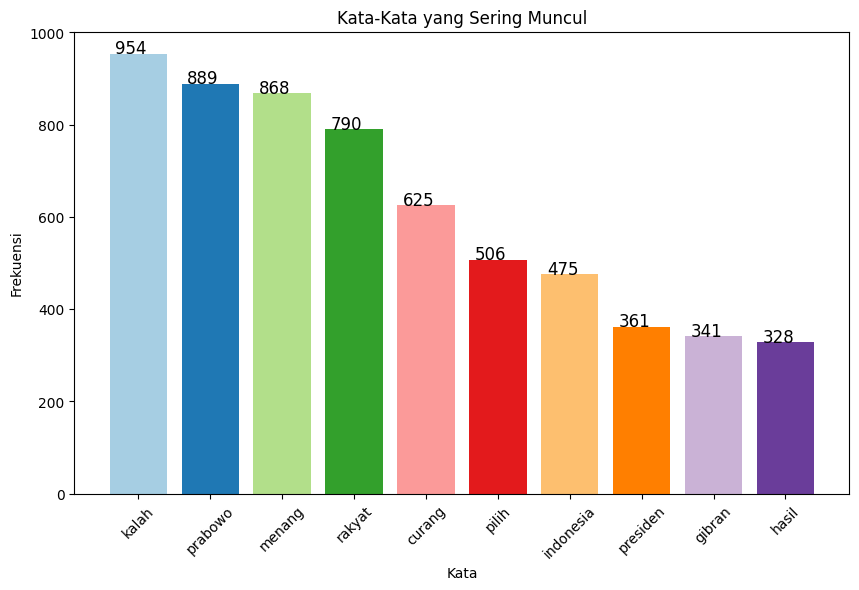

In [ ]:
import matplotlib.pyplot as plt
from collections import  Counter

text = " ".join(df['Stemming'])

tokens = text.split()
counter = Counter(tokens)

most_common = counter.most_common(10)
words, counts = zip(*most_common)

# x, y = zip(*most_common)
# plt.bar(x, y)

colors = plt.cm.Paired(range(len(words)))

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-Kata yang Sering Muncul')
plt.xticks(rotation=45)

for bar, num in zip(bars, counts):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize = 12, color='black' ,ha='center')

plt.show()

In [ ]:
#Mengimpor library pandas dan memberikan alias pd
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('cleaned_comments.csv')

# Mengisi nilai yang hilang (NaN) dengan string kosong
data['Stemming'].fillna('', inplace=True)

text = " ".join(data['Stemming'])
tokens = text.split()
#menghitung frekuensi kemunculan setiap kata
word_counts = Counter(tokens)

#menampilkan 10 kata teratas
most_common_words = word_counts.most_common(10)

words, counts = zip(*most_common_words)
data = pd.DataFrame({'Kata': words, 'Frekuensi': counts})

data.to_csv('most_common_words.csv', index=False)

In [ ]:
# Simpan DataFrame yang telah dibersihkan ke file CSV
df.to_csv('cleaned_comments.csv', index=False)

**4.Translate**

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install deep-translator

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv('cleaned_comments.csv')

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def convert_english(text):
    try:
        translated_text = GoogleTranslator(source='auto', target='en').translate(text)
        print(f"Translating '{text}' to '{translated_text}'")
        return translated_text
    except Exception as e:
        print(f"Error translating '{text}': {e}")
        return text

# Menerapkan fungsi convert_english ke kolom 'Stemming' dan menambahkan hasilnya ke kolom 'English'
data['Translated'] = data['Stemming'].apply(convert_english)

# Menyimpan hasil ke file CSV baru
data.to_csv('translated_data.csv', index=False)

# Menampilkan DataFrame
df

Translating 'daerah aceh laut biru' to 'aceh blue sea area'
Translating 'laut biru' to 'blue sea'
Translating 'balikpapan laut biru' to 'Balikpapan blue sea'
Translating 'masuk laut biru' to 'enter the blue sea'
Translating 'kalimantan timur daerah bontang' to 'East Kalimantan Bontang area'
Translating 'partai gerindra' to 'Gerindra Party'
Translating 'misi laut biru' to 'blue sea mission'
Translating 'bantu bangun abang lahan abang' to 'help wake up brother land brother'
Translating 'sedihg' to 'sadg'
Translating 'anggota dprri' to 'DPR member'
Translating 'koalisi' to 'coalition'
Translating 'anies baswedan caimin menang' to 'Anies Baswedan and Caimin won'
Translating 'alhmdulillah alhmdulillah allah amin' to 'Alhamdulillah Alhamdulillah God Amen'
Translating 'angkuh haus jabat bahasa' to 'arrogantly thirsty for language'
Translating 'quick count bohong publik hasil kpu maret bohong quick count pakai akal waras' to 'quick count lied to the public KPU March results lied quick count us

,Username,Comment,Normalisasi,Tokenization,Stopwords,Stemming
0,@SalehBangko,Daerah Aceh laut biru 25.00,daerah aceh laut biru,"[daerah, aceh, laut, biru]","[daerah, aceh, laut, biru]",daerah aceh laut biru
1,@SalehBangko,110 laut biru pak,laut biru pak,"[laut, biru, pak]","[laut, biru]",laut biru
2,@SalehBangko,Dari balikpapan 21.00 laut biru,dari balikpapan laut biru,"[dari, balikpapan, laut, biru]","[balikpapan, laut, biru]",balikpapan laut biru
3,@SalehBangko,Masuk lagi laut biru 27.00 jumlahnya,masuk lagi laut biru jumlahnya,"[masuk, lagi, laut, biru, jumlahnya]","[masuk, laut, biru]",masuk laut biru
4,@SalehBangko,Kalimantan Timur daerah bontang 57.00,kalimantan timur daerah bontang,"[kalimantan, timur, daerah, bontang]","[kalimantan, timur, daerah, bontang]",kalimantan timur daerah bontang
...,...,...,...,...,...,...
4435,@E2dhndca,Banyak bukti video 02 terceblos sebelum kotak ...,banyak bukti video terceblos sebelum kotak sua...,"[banyak, bukti, video, terceblos, sebelum, kot...","[bukti, video, terceblos, kotak, suara, video,...",bukti video terceblos kotak suara video edar s...
4436,@srinurhidayati3323,Alhamdulillah prabowo gibran ttp terbaik power...,alhamdulillah prabowo gibran tetap terbaik pow...,"[alhamdulillah, prabowo, gibran, tetap, terbai...","[alhamdulillah, prabowo, gibran, terbaik, powe...",alhamdulillah prabowo gibran baik power lieder...
4437,@DadiRohadi-gz7dp,Waw 03 minta d ulang cape aah udh jls 02 mnang,wow meminta di ulang capek aah sudah jls mnang,"[wow, meminta, di, ulang, capek, aah, sudah, j...","[wow, ulang, capek, aah, jls, mnang]",wow ulang capek aah jls mnang
4439,@user-qw1hp8nn6p,03 minta di ulang pemilunya 😅,meminta di ulang pemilunya,"[meminta, di, ulang, pemilunya]","[ulang, pemilunya]",ulang milu


**5.Labeling**

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
import numpy as np
import pandas as pd

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv('translated_data.csv')

sentiment = []

for text in data['Translated']:
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        sentiment.append(polarity)
    else:
        sentiment.append(np.nan)

data['Sentiment_polarity'] = sentiment
data['Sentiment'] = data['Sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

data = data[['Username', 'Comment', 'Stemming', 'Translated', 'Sentiment_polarity', 'Sentiment']]

# Menyimpan DataFrame ke file CSV
data.to_csv('labeled_data.csv', index=False)

In [ ]:
import pandas as pd

# Assuming 'data' DataFrame has a 'Sentiment' column
sentiment_counts = data['Sentiment'].value_counts()

# Menampilkan hasil dalam format tabel
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']
# Menghapus baris dengan Sentiment 'unknown'
sentiment_counts_df = sentiment_counts_df[sentiment_counts_df['Sentiment'] != 'unknown']
print(sentiment_counts_df)

# Menyimpan hasil ke dalam file CSV
sentiment_counts_df.to_csv('sentiment_distribution.csv', index=False)

  Sentiment  Count
0  positive   1853
1   neutral   1681
2  negative    637


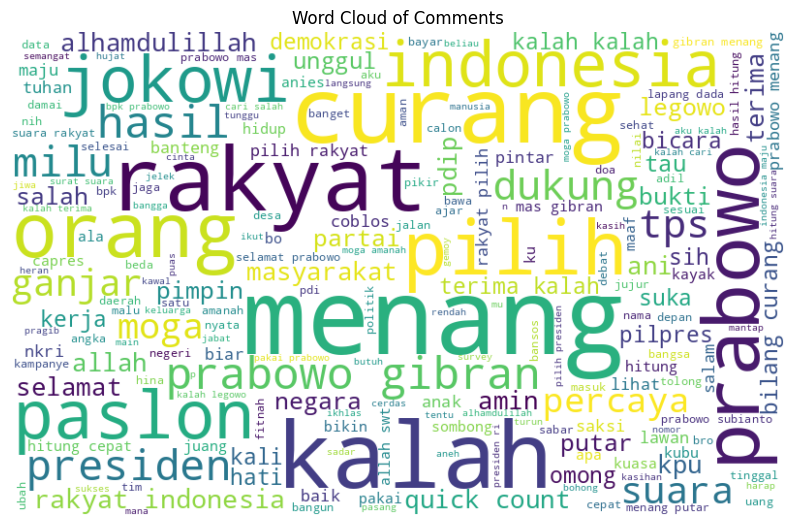

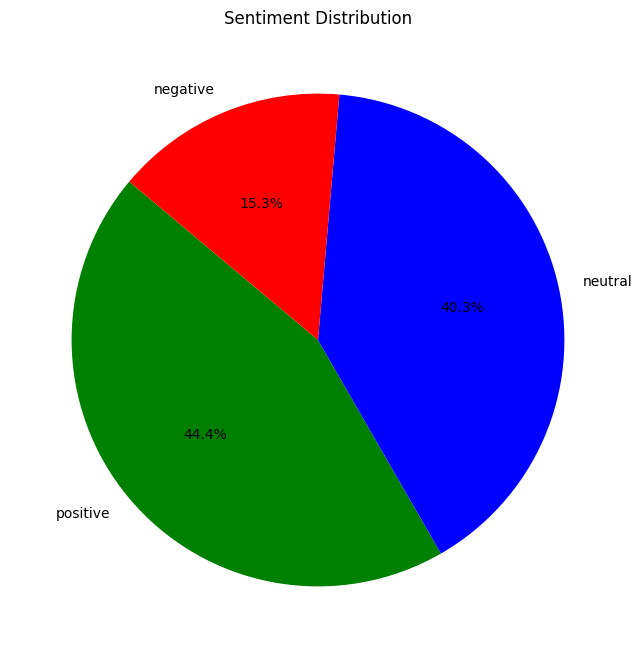

<ipython-input-178-fcb84828ff8e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Sentiment', y='Count', data=sentiment_data, palette=['green', 'blue', 'red'])


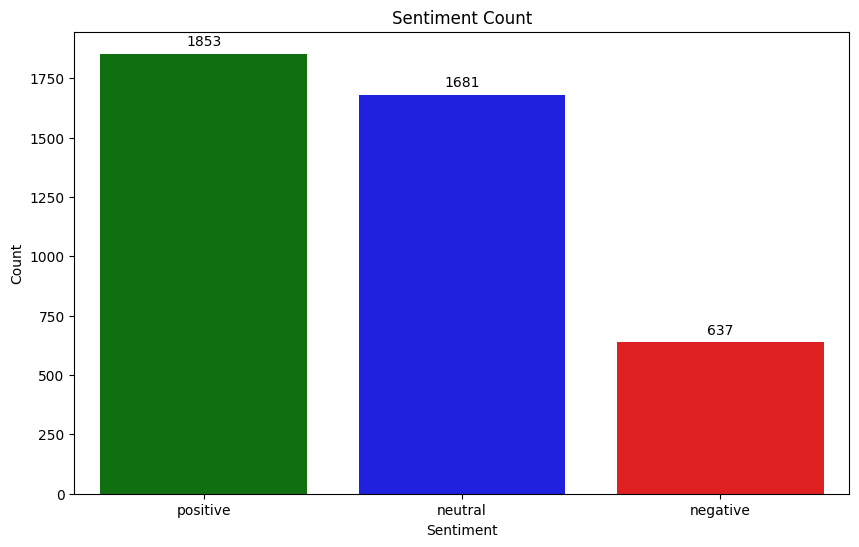

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv('labeled_data.csv')
sentiment_data = pd.read_csv('sentiment_distribution.csv')

# Membuat Word Cloud dari kolom komentar
all_words = ' '.join([text for text in data['Stemming'] if isinstance(text, str)])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

# Membuat Pie Chart untuk Sentiment
plt.figure(figsize=(8, 8))
plt.pie(sentiment_data['Count'], labels=sentiment_data['Sentiment'], autopct='%1.1f%%', startangle=140, colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.show()

# Membuat Diagram Batang untuk Sentiment
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Sentiment', y='Count', data=sentiment_data, palette=['green', 'blue', 'red'])

# Menambahkan jumlah data pada setiap batang
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
print(data.columns)

Index(['Username', 'Comment', 'Stemming', 'Translated', 'Sentiment_polarity',
       'Sentiment'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Username            4171 non-null   object 
 1   Comment             4171 non-null   object 
 2   Stemming            4170 non-null   object 
 3   Translated          4170 non-null   object 
 4   Sentiment_polarity  4170 non-null   float64
 5   Sentiment           4171 non-null   object 
dtypes: float64(1), object(5)
memory usage: 195.6+ KB


**6.Modelling**

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Translated'], data['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
print(f'Jumlah data training: {len(X_train)}')
print(f'Jumlah data testing: {len(X_test)}')

Jumlah data training: 3336
Jumlah data testing: 835


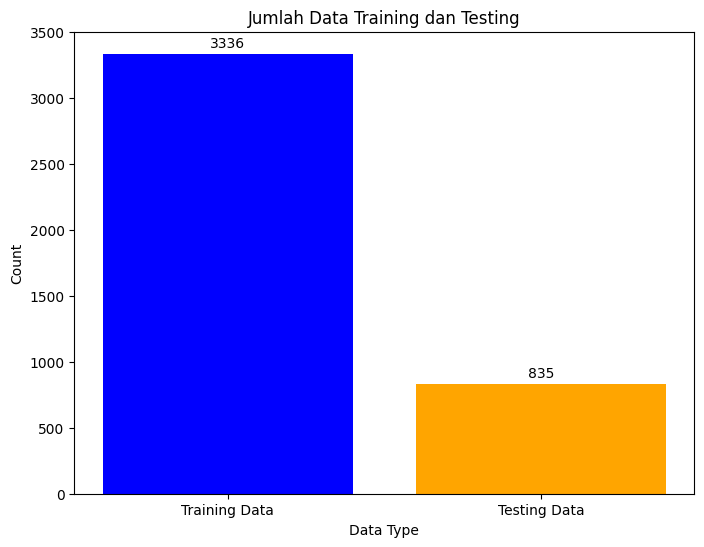

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for visualization
data_counts = {'Training Data': len(X_train), 'Testing Data': len(X_test)}

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data_counts.keys(), data_counts.values(), color=['blue', 'orange'])
ax.set_xlabel('Data Type')
ax.set_ylabel('Count')
ax.set_title('Jumlah Data Training dan Testing')
ax.text(0, len(X_train) + 50, str(len(X_train)), ha='center')
ax.text(1, len(X_test) + 50, str(len(X_test)), ha='center')
plt.show()


In [ ]:
# Handle NaN values in X_test before vectorizing
X_test = X_test.fillna('')  # Replace NaN with empty strings

# Update vectorizer with different parameters
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2), min_df=5, max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediction and evaluation
predictions = best_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, predictions))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, predictions))

Akurasi: 0.73

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.41      0.55       127
     neutral       0.80      0.67      0.73       355
    positive       0.67      0.90      0.77       353

    accuracy                           0.73       835
   macro avg       0.77      0.66      0.68       835
weighted avg       0.75      0.73      0.72       835


Confusion Matrix:
 [[ 52  29  46]
 [  5 239 111]
 [  5  32 316]]


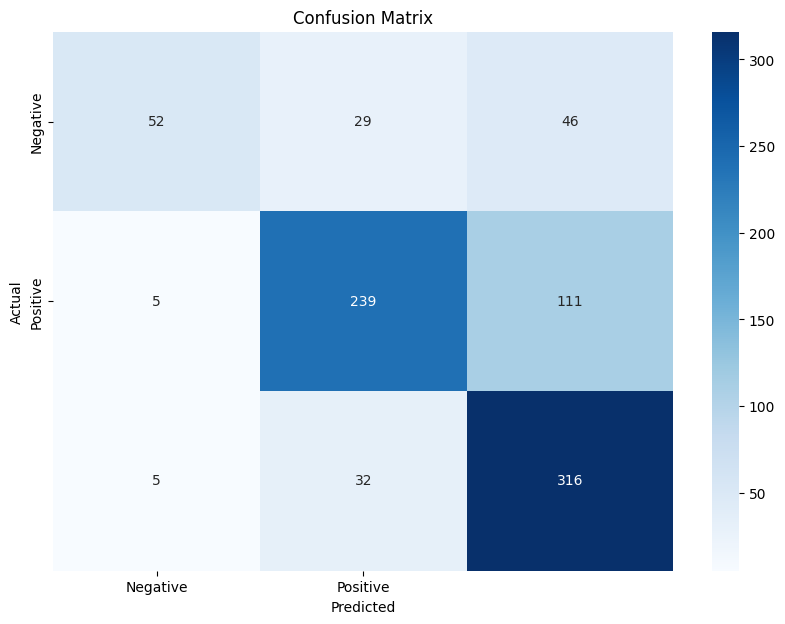

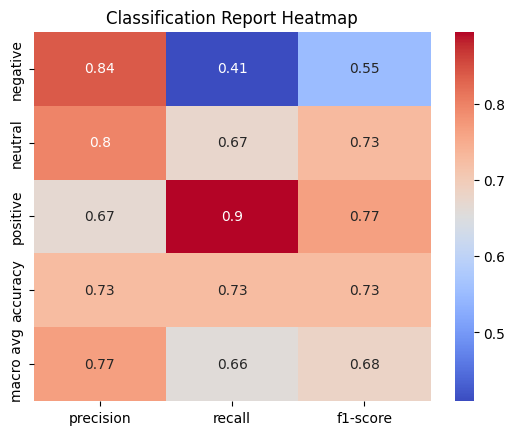

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report as heatmap
report = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

In [ ]:
from googletrans import Translator

# Identify top words per topic
def get_top_words(model, vectorizer, n=10):
    feature_names = vectorizer.get_feature_names_out()
    top_words = {}
    for i, topic in enumerate(model.classes_):
        # Use feature_log_prob_ instead of coef_ for MultinomialNB
        indices = model.feature_log_prob_[i].argsort()[-n:]
        top_words[topic] = [feature_names[j] for j in indices]
    return top_words

top_words = get_top_words(model, vectorizer)
print("Top words in English:", top_words)

# Translate top words back to Indonesian using googletrans
def translate_top_words(top_words):
    translator = Translator()
    translated_top_words = {}
    for topic, words in top_words.items():
        translated_top_words[topic] = [translator.translate(word, src='en', dest='id').text for word in words]
    return translated_top_words

translated_top_words = translate_top_words(top_words)
print("Top words in Indonesian:", translated_top_words)

Top words in English: {'negative': ['jokowi', 'results', 'prabowo', 'stupid', 'lose', 'candidate', 'cheating', 'wrong', 'people', 'sorry'], 'neutral': ['won', 'gibran', 'god', 'president', 'thank', 'lose', 'people', 'lost', 'cheating', 'prabowo'], 'positive': ['gibran', 'cheating', 'good', 'indonesia', 'quick', 'count', 'wins', 'prabowo', 'people', 'win']}
Top words in Indonesian: {'negative': ['Jokowi', 'Hasil', 'Prabowo', 'bodoh', 'kehilangan', 'calon', 'curang', 'salah', 'rakyat', 'Maaf'], 'neutral': ['won', 'Gibran', 'Tuhan', 'Presiden', 'terima kasih', 'kehilangan', 'rakyat', 'hilang', 'curang', 'Prabowo'], 'positive': ['Gibran', 'curang', 'Bagus', 'Indonesia', 'cepat', 'menghitung', 'menang', 'Prabowo', 'rakyat', 'menang']}


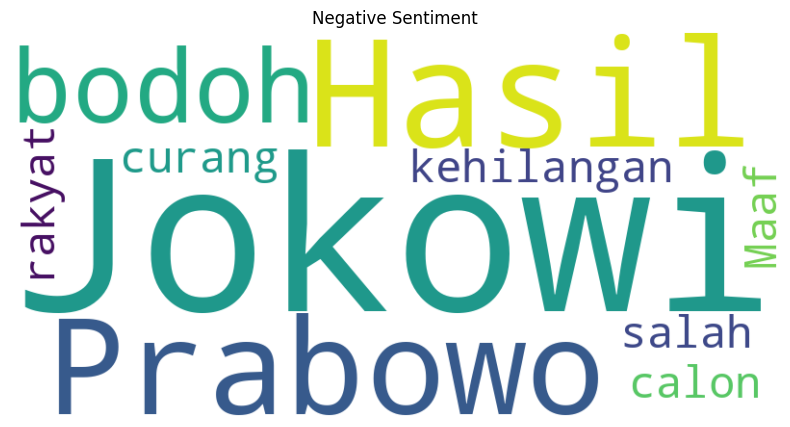

Top words in Negative: ['Jokowi', 'Hasil', 'Prabowo', 'bodoh', 'kehilangan', 'calon', 'curang', 'salah', 'rakyat', 'Maaf']


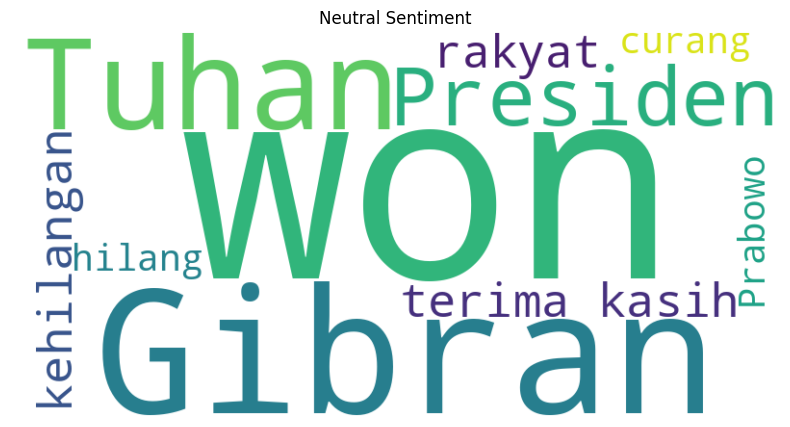

Top words in Neutral: ['won', 'Gibran', 'Tuhan', 'Presiden', 'terima kasih', 'kehilangan', 'rakyat', 'hilang', 'curang', 'Prabowo']


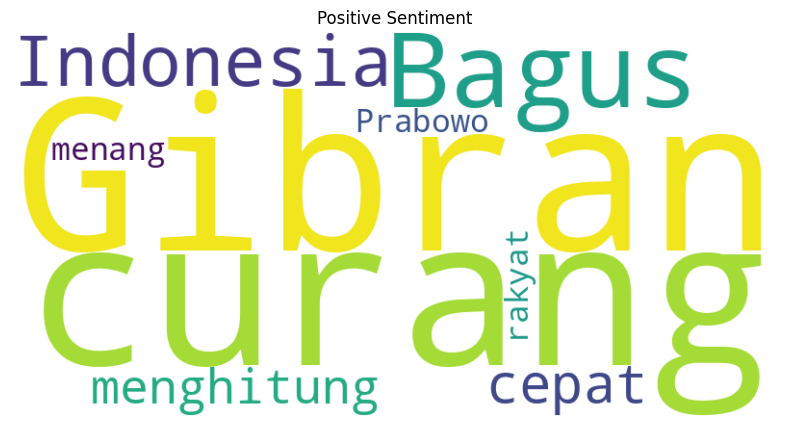

Top words in Positive: ['Gibran', 'curang', 'Bagus', 'Indonesia', 'cepat', 'menghitung', 'menang', 'Prabowo', 'rakyat', 'menang']


<ipython-input-192-32d89a1f4786>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')
<ipython-input-192-32d89a1f4786>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')
<ipython-input-192-32d89a1f4786>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


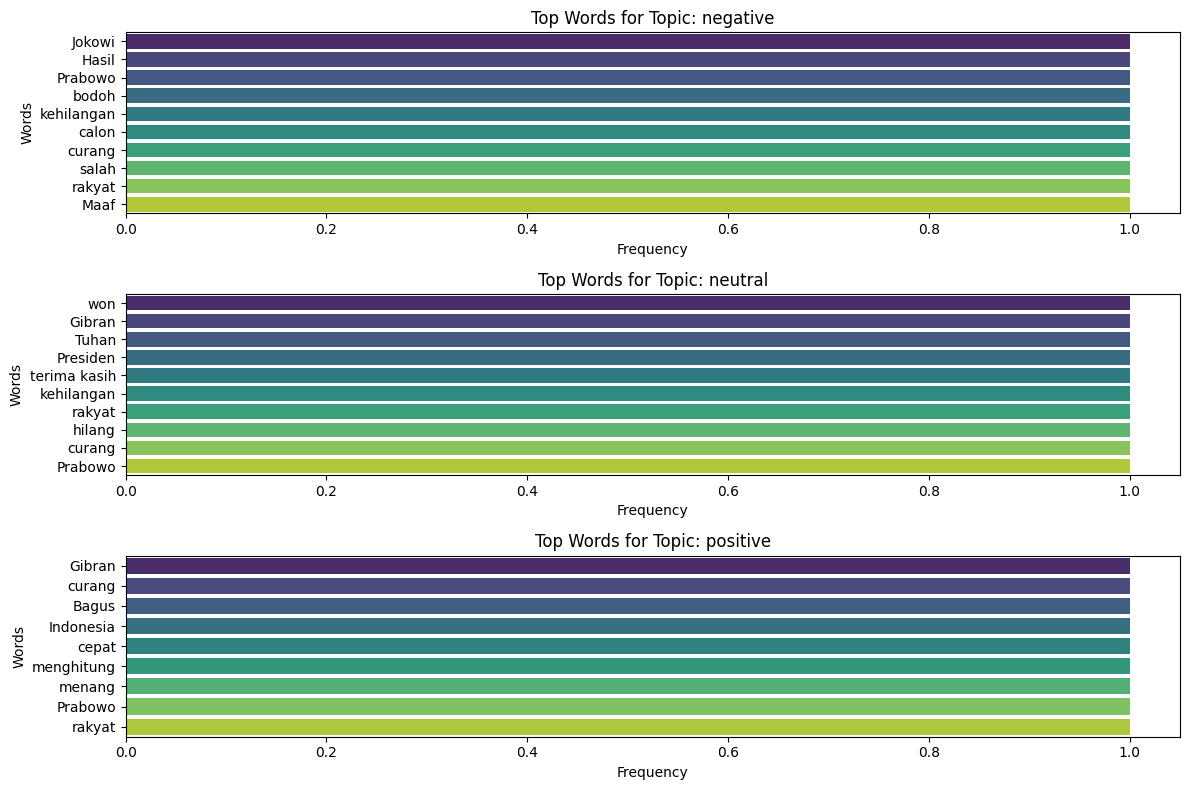

In [ ]:
import seaborn as sns

# Visualize and save WordCloud for each sentiment category
def display_and_save_wordclouds(top_words):
    for sentiment, words in top_words.items():
        word_freq = {word: 1 for word in words}  # Mengasumsikan frekuensi tiap kata adalah 1 untuk visualisasi
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Menampilkan WordCloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{sentiment.capitalize()} Sentiment')

        # Menyimpan WordCloud
        plt.savefig(f'wordcloud_{sentiment}.png', bbox_inches='tight')
        plt.show()  # Menampilkan WordCloud dan memberi jarak break line tiap gambar
        plt.close()  # Menutup plot untuk menghindari overlap pada plot berikutnya

        # Menampilkan text dari top_words
        print(f'Top words in {sentiment.capitalize()}:', words)

# Menampilkan dan menyimpan gambar WordCloud serta menampilkan text top words
display_and_save_wordclouds(translated_top_words)

# Optionally, you can create bar charts for the top words
def plot_top_words_bar(top_words):
    plt.figure(figsize=(12, 8))
    for i, (topic, words) in enumerate(top_words.items()):
        plt.subplot(len(top_words), 1, i + 1)
        word_freq = {word: 1 for word in words}  # Assuming frequency of each word is 1 for visualization
        sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
        words, freqs = zip(*sorted_words)
        sns.barplot(x=freqs, y=words, palette='viridis')
        plt.title(f'Top Words for Topic: {topic}')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

# Plot bar charts for top words
plot_top_words_bar(translated_top_words)